In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib

import cartopy as cart

import cartopy.crs as ccrs
import cmocean.cm as cmo
import seaborn as sns
from glob import glob
import cartopy.feature as cfeature
import pandas as pd

from scipy import stats
import matplotlib.cm as cm

import random
from tqdm import tqdm

In [3]:
moi_bathy = xr.load_dataset("/storage/shared/oceanparcels/input_data/MOi/domain_ORCA0083-N006/bathymetry_ORCA12_V3.3.nc")

In [4]:
lat_obs = -32.171
lon_obs = 6.287

lon_rest = abs(moi_bathy['nav_lon'][0,:] - lon_obs)
lat_rest = abs(moi_bathy['nav_lat'][:,0] - lat_obs)
lon_index = np.where(lon_rest == lon_rest.min())[0][0]
lat_index = np.where(lat_rest == lat_rest.min())[0][0]

In [5]:
initial_depth = moi_bathy['Bathymetry'][lat_index,lon_index].values
initial_lon = moi_bathy['nav_lon'][lat_index,lon_index].values
initial_lat = moi_bathy['nav_lat'][lat_index,lon_index].values

In [6]:
lon_sample = 6.287
lat_sample = -32.171
n_points = 10000

lon_cluster = [lon_sample]*n_points + np.random.normal(loc=0, scale=0.01, size=n_points)
lat_cluster = [lat_sample]*n_points + np.random.normal(loc=0, scale=0.01, size=n_points)
lon_cluster = np.array(lon_cluster) 
lat_cluster = np.array(lat_cluster)


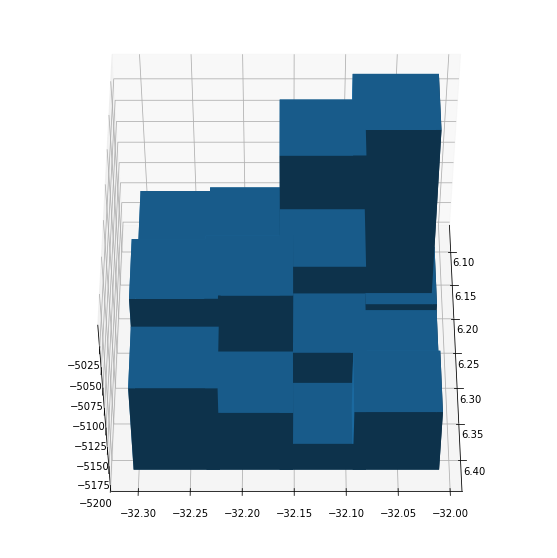

In [7]:
n = 2
lon_range = range(lon_index-2,lon_index+2)
lat_range = range(lat_index-2, lat_index+2)

sea_floor = 5200 - moi_bathy['Bathymetry'][lat_range, lon_range].values.ravel()
sea_lat =  moi_bathy['nav_lat'][lat_range, lon_range].values.ravel()
sea_lon =  moi_bathy['nav_lon'][lat_range, lon_range].values.ravel()

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
dx = dy = 1/12 * np.ones_like(sea_floor)
dz= np.zeros_like(sea_floor) - 5200

ax.bar3d(sea_lon, sea_lat, dz, dx, dy, sea_floor, zorder=1)
# ax.scatter3D(initial_lon, initial_lat, -5000, color='r', s=100)

ax.view_init(elev=50., azim=0)

In [8]:
sim = xr.open_zarr('/storage/shared/oceanparcels/output_data/data_Claudio/tests/peeep.zarr/')

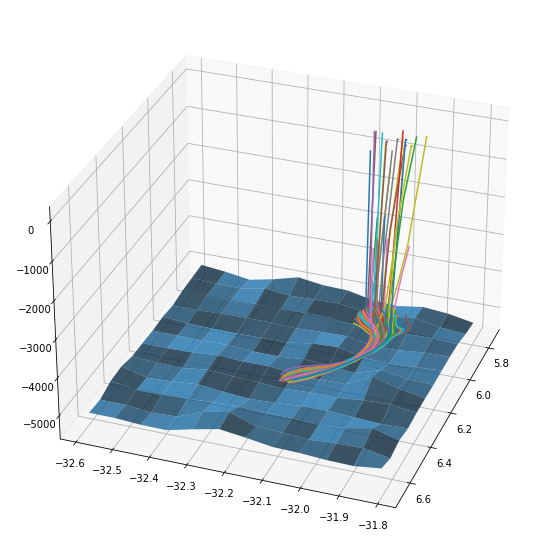

In [9]:
n = 6
lon_range = range(lon_index-n,lon_index+n)
lat_range = range(lat_index-n, lat_index+n)

sea_floor = - moi_bathy['Bathymetry'][lat_range, lon_range].values
sea_lat =  moi_bathy['nav_lat'][lat_range, lon_range].values
sea_lon =  moi_bathy['nav_lon'][lat_range, lon_range].values

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

# dx = dy = 1/12 * np.ones_like(sea_floor)
# dz= np.zeros_like(sea_floor) - 5200

ax.plot_surface(sea_lon, sea_lat, sea_floor, alpha=0.8, zorder=0)
ax.scatter3D(initial_lon, initial_lat, -5100, color='r', s=100, zorder=2000)
fin = 100
for i in range(100):
    ax.plot3D(sim['lon'][i, :fin], sim['lat'][i, :fin], -sim['z'][i, :fin], zorder=2000)


ax.view_init(elev=30., azim=20)

In [10]:
lon_sample = 6.287
lat_sample = -32.171
n_points = 10000

lon_cluster = [initial_lon]*n_points + np.random.normal(loc=0, scale=0.01, size=n_points)
lat_cluster = [initial_lat]*n_points + np.random.normal(loc=0, scale=0.01, size=n_points)
lon_cluster = np.array(lon_cluster) 
lat_cluster = np.array(lat_cluster)

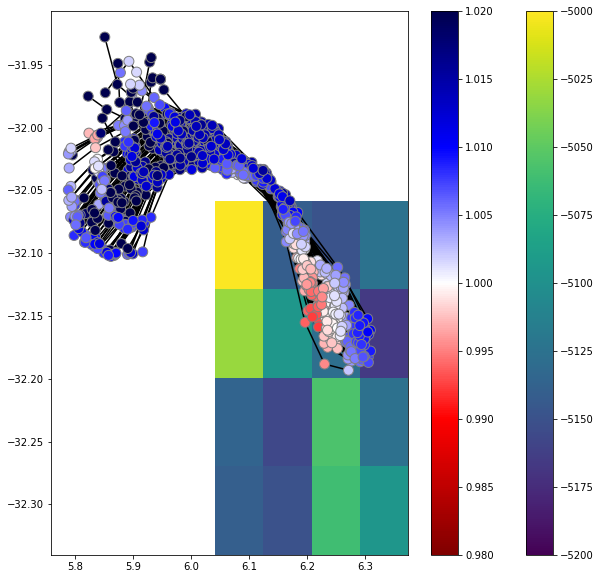

In [11]:
n = 3
lon_range = range(lon_index-2,lon_index+2)
lat_range = range(lat_index-2, lat_index+2)

sea_floor = - moi_bathy['Bathymetry'][lat_range, lon_range].values
sea_lat =  moi_bathy['nav_lat'][lat_range, lon_range].values
sea_lon =  moi_bathy['nav_lon'][lat_range, lon_range].values

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()

im = ax.pcolormesh(sea_lon, sea_lat, sea_floor, shading='auto', vmax=-5000, vmin=-5200)
# ax.scatter(lon_cluster, lat_cluster)
# ax.scatter(lon_sample, lat_sample)
fin = 100
for i in range(100):
    ax.plot(sim['lon'][i, :fin], sim['lat'][i, :fin], color='k')

im2 = plt.scatter(sim['lon'][:, :fin], sim['lat'][:, :fin], 
            c = sim['seafloor'][:, :fin]/sim['z'][:, :fin], zorder=3, 
            edgecolors='grey', s=100, cmap='seismic_r', vmin=0.98, vmax=1.02)

ax.scatter(initial_lon, initial_lat, color='r', s=100)
plt.colorbar(im)
plt.colorbar(im2)


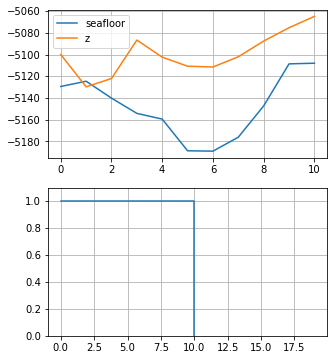

In [13]:
p = 33
plt.figure(figsize=(5,6))
ax1 = plt.subplot(211)
ax1.plot(-sim['seafloor'][p,:], label='seafloor')
ax1.plot(-sim['z'][p, :], label='z')
ax1.grid()
ax1.legend()

ax2 = plt.subplot(212)
ax2.plot(sim['in_motion'][p,:], label='seafloor')
ax2.grid()
# ax2.set_xlim(-0.5,10.5)
ax2.set_ylim(0, 1.1)
ax1.legend()

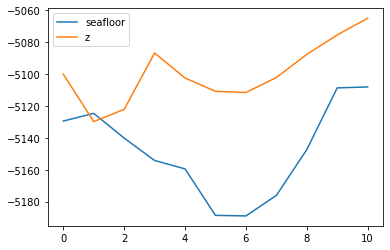

In [14]:
p = 33
plt.plot(-sim['seafloor'][p,:], label='seafloor')
plt.plot(-sim['z'][p, :], label='z')
plt.legend()

In [24]:
len(s)

2919

In [25]:
s

array([   0,    4,    6, ..., 9997, 9998, 9999])

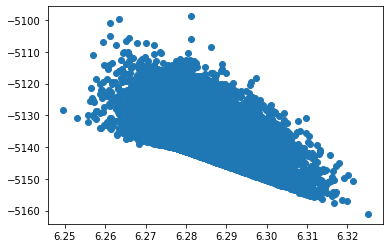

In [26]:
plt.scatter(sim['lon'][:, 0], -sim['seafloor'][:,0])

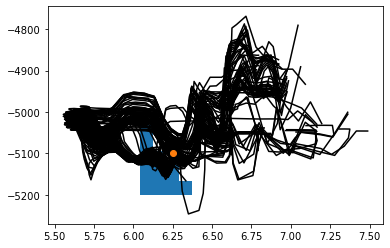

In [28]:
plt.bar(moi_bathy['nav_lon'][lat_index, lon_range], 5200-moi_bathy['Bathymetry'][lat_index, lon_range], bottom=-5200, width=1/12)
# plt.scatter(initial_lon, -5100)
plt.plot(moi_bathy['nav_lon'][lat_index, lon_range], -moi_bathy['Bathymetry'][lat_index, lon_range], color='k')

fin = 50
for i in range(100):
    plt.plot(sim['lon'][i, :fin], -sim['z'][i, :fin], color='k')
plt.scatter(initial_lon, -5100, zorder=3)


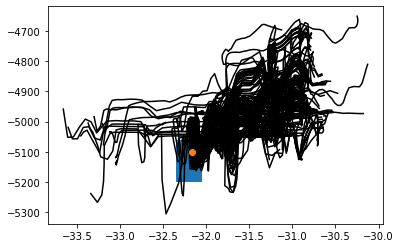

In [29]:
plt.bar(moi_bathy['nav_lat'][lat_range, lon_index], 5200 - moi_bathy['Bathymetry'][lat_range, lon_index], bottom=-5200, width=1/12)
# plt.scatter(initial_lat, -5100)
fin = 100
for i in range(100):
    plt.plot(sim['lat'][i, :fin], -sim['z'][i, :fin], color='k')
plt.scatter(initial_lat, -5100, zorder=3)

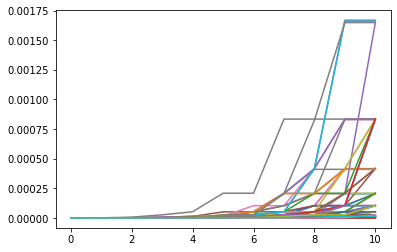

In [15]:
for i in range(100):
#     plt.plot(sim['seafloor'][i, :]/sim['z'][i,:], color='k')
    plt.plot(sim['diameter'][i, :])
    
# plt.axhline(0)
# plt.ylim(-0.1,1.1)